In [1]:
%matplotlib inline


# Polynomial interpolation


This example demonstrates how to approximate a function with a polynomial of
degree n_degree by using ridge regression. Concretely, from n_samples 1d
points, it suffices to build the Vandermonde matrix, which is n_samples x
n_degree+1 and has the following form:

[[1, x_1, x_1 ** 2, x_1 ** 3, ...],
 [1, x_2, x_2 ** 2, x_2 ** 3, ...],
 ...]

Intuitively, this matrix can be interpreted as a matrix of pseudo features (the
points raised to some power). The matrix is akin to (but different from) the
matrix induced by a polynomial kernel.

This example shows that you can do non-linear regression with a linear model,
using a pipeline to add non-linear features. Kernel methods extend this idea
and can induce very high (even infinite) dimensional feature spaces.


Automatically created module for IPython interactive environment


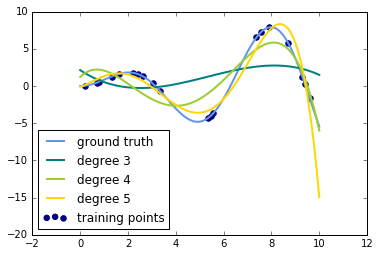

In [2]:
print(__doc__)

# Author: Mathieu Blondel
#         Jake Vanderplas
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()